# Cartooning an Image using OpenCV – Python


In [1]:
# importing libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

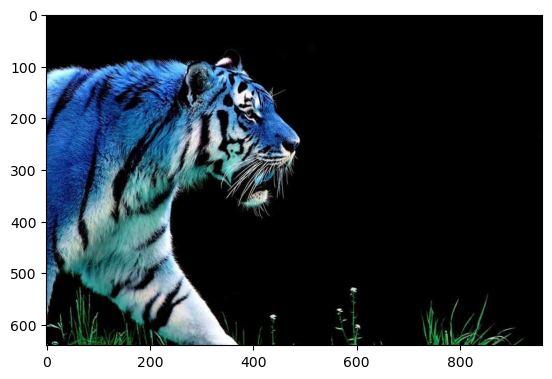

In [ ]:
img = cv2.imread('images/tiger.jpg')
plt.imshow(img)
# you will notice that the colours are BGR format and not RGB

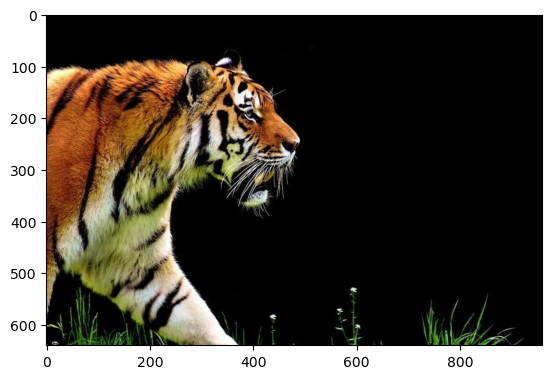

In [3]:
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb)
# now the colours are in RGB format

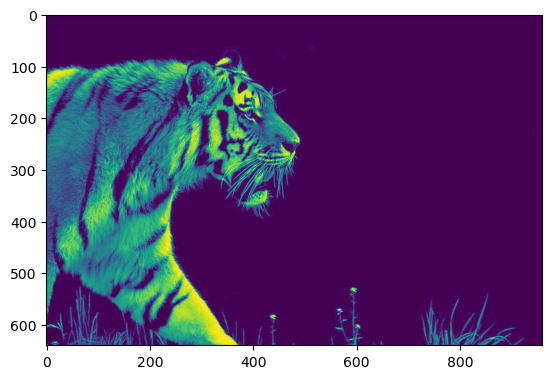

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

In [5]:
gaussian_blur = cv2.GaussianBlur(gray, (3, 3), 1)

In [6]:
# adaptive threshold edge detection
adpt_thresh_edges = cv2.adaptiveThreshold(gaussian_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
              cv2.THRESH_BINARY, 11, 11)

In [7]:
canny_edges = cv2.Canny(gaussian_blur, threshold1=30, threshold2=180)
_, thresh_canny_edges = cv2.threshold(canny_edges, 30, 180, cv2.THRESH_BINARY)

Other edge detection functions were used, but to no avail.
The error below would be generated when applying the edges as masks.
```
OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\core\src\arithm.cpp:230: error: (-215:Assertion failed) (mtype == CV_8U || mtype == CV_8S) && _mask.sameSize(*psrc1) in function 'cv::binary_op'
```

In [8]:
sobelx = cv2.Sobel(src=gaussian_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axis
sobely = cv2.Sobel(src=gaussian_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axis
sobel_edges = cv2.Sobel(src=gaussian_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) # Combined X and Y Sobel Edge Detection
laplacian_edges = cv2.Laplacian(gaussian_blur,cv2.CV_64F)

Bitwise operations can be carried out on image: images are basically pixels with rgb values 0-255 depicting the colour within them.

```
cv2.bitwise_and(color, color, mask=edges)
```
As seen in the example above, a mask can be applied: it means that it defines which parts of the image should be included in the operation.

- White (mask=255) in the mask allows the operation to occur.
- Black (mask=0) in the mask blocks the operation, resulting in a black output for those pixels.
- mask=edges here means that edges of the image will be highlighted

In [24]:
# Cartoonization
color = cv2.bilateralFilter(img, 11, 250, 250)
adpt_thresh_cartoon = cv2.bitwise_and(color, color, mask=adpt_thresh_edges)
canny_cartoon = cv2.bitwise_and(color, color, mask=cv2.bitwise_not(thresh_canny_edges))

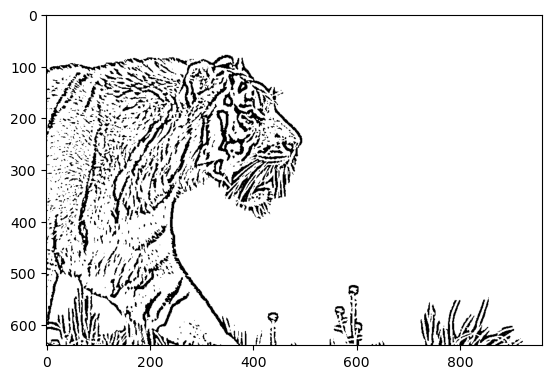

In [ ]:
plt.imshow(cv2.cvtColor(adpt_thresh_edges, cv2.COLOR_BGR2RGB))

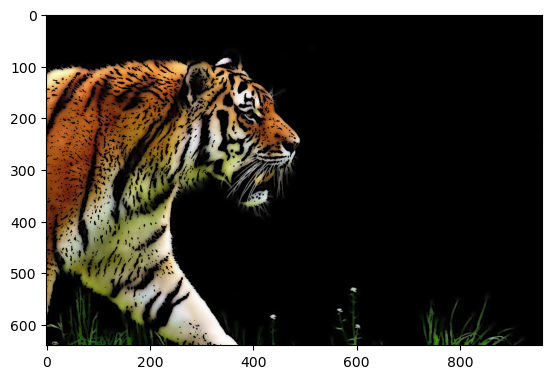

In [11]:
adpt_thresh_cartoon = cv2.cvtColor(adpt_thresh_cartoon, cv2.COLOR_BGR2RGB)
plt.imshow(adpt_thresh_cartoon)

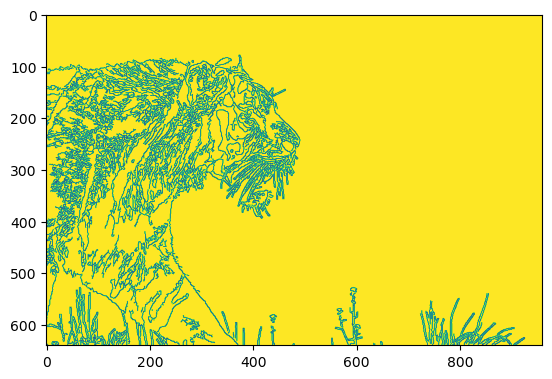

In [23]:
plt.imshow(cv2.bitwise_not(thresh_canny_edges))

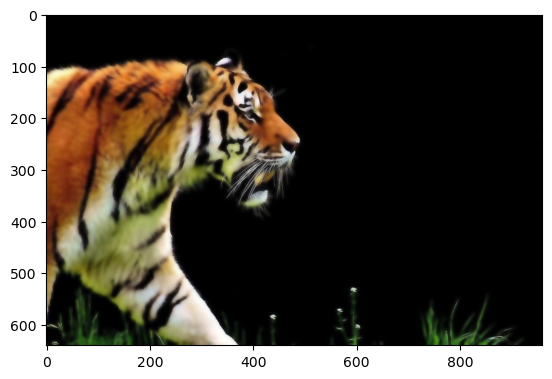

In [25]:
canny_cartoon = cv2.cvtColor(canny_cartoon, cv2.COLOR_BGR2RGB)
plt.imshow(canny_cartoon)

This process is a general one and will not give the best result for different images. The number of bilateral filters applied, size of the filter or the threshold technique to get the edges could be modified for better results.